In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("uber.csv")
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
df.dtypes

Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [5]:
df.isna().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.isna().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [8]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime']);
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5


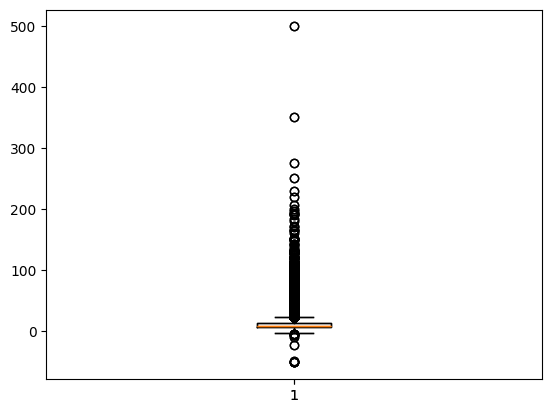

In [14]:
plt.boxplot(df['fare_amount'])
plt.show()

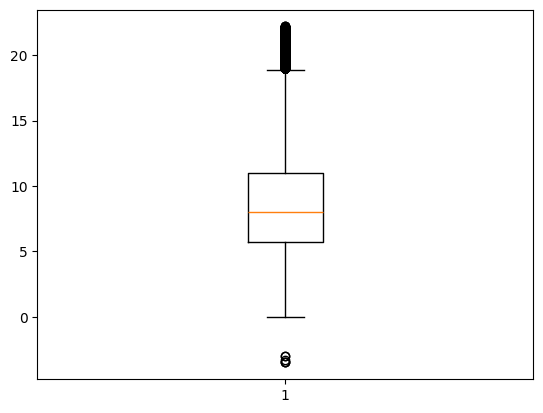

In [19]:
q1 = df['fare_amount'].quantile(0.25)
q3 = df['fare_amount'].quantile(0.75)

iqr = q3-q1
lb = q1-1.5*iqr
ub = q3+ 1.5*iqr

df = df[(df['fare_amount']<ub) & (df['fare_amount']>lb)]

plt.boxplot(df['fare_amount'])
plt.show()

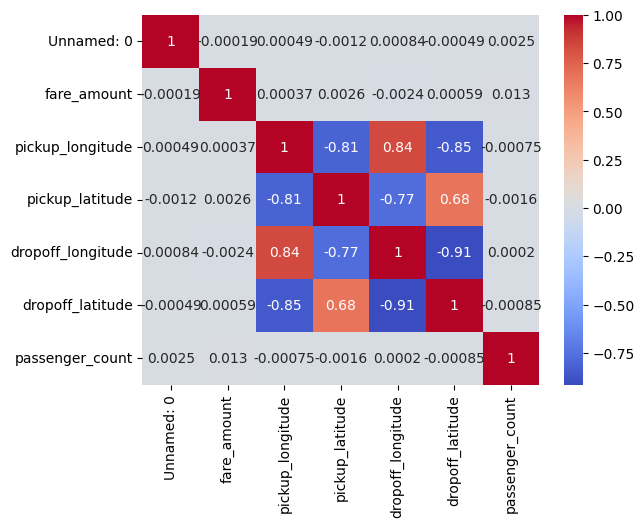

In [23]:
plt.figure("Correlation")
sns.heatmap(df.corr(numeric_only=True),cmap="coolwarm",annot=True)
plt.show()

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x = df.drop("fare_amount",axis=1)
y = df["fare_amount"]
x["pickup_datetime"] = pd.to_numeric(x["pickup_datetime"])
x= x.loc[:,x.columns.str.contains("^Unnamed")]
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182833 entries, 0 to 199999
Data columns (total 1 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   Unnamed: 0  182833 non-null  int64
dtypes: int64(1)
memory usage: 2.8 MB


In [27]:
xTrain,xTest,yTrain,yTest = train_test_split(x,y,test_size=0.8,random_state=42)

In [30]:
lr = LinearRegression()
lr.fit(xTrain,yTrain)

LinearRegression()

In [31]:
yPred = lr.predict(xTest)

In [34]:
from sklearn.metrics import root_mean_squared_error,r2_score
rmse = root_mean_squared_error(yTest,yPred)
print(rmse)
r2 = r2_score(yTest,yPred)
print(r2)

4.1456626469275655
-3.614115885430813e-05


In [36]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=101,random_state=100)

rfr.fit(xTrain,yTrain)

pred = rfr.predict(xTest)
print(root_mean_squared_error(yTest,pred))
print(r2_score(yTest,pred))

5.017466196092361
-0.46486191884237105
